In [25]:
#create Custom dataset class

import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
class FlowerDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.samples = []
        for cls_idx, cls_name in enumerate(self.classes):
            cls_dir = os.path.join(root_dir, cls_name)
            for filename in os.listdir(cls_dir):
                filepath = os.path.join(cls_dir, filename)
                self.samples.append((filepath, cls_idx))
        
        if transform is None:
            self.transform = transforms.Compose([transforms.ToTensor()])
        else:
            self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        filepath, cls_idx = self.samples[idx]
        image = Image.open(filepath)
        image = image.convert('RGB')
        
        # Apply the transform to the image
        image = self.transform(image)
        
        target = torch.tensor(cls_idx, dtype=torch.long)
        return image, target


In [26]:
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Change the size to whatever you need
    transforms.ToTensor(),
])


In [27]:
#instantiate the class with the root directory of the project
transform = transforms.Compose([transforms.ToTensor()])
dataset = FlowerDataset('/content/drive/My Drive/custom_data_set', transform=resize_transform)


In [28]:
# Split dataset into training, validation, and test sets
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = (len(dataset) - train_size) // 2
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

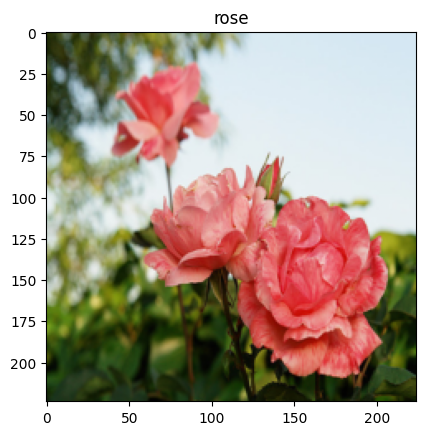

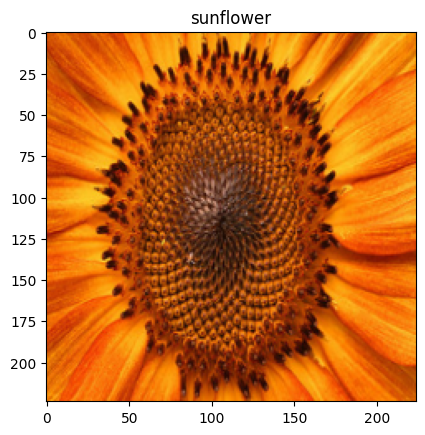

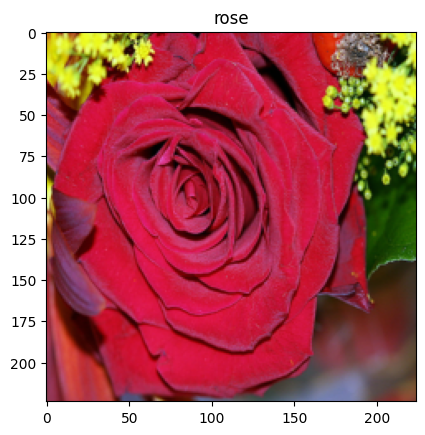

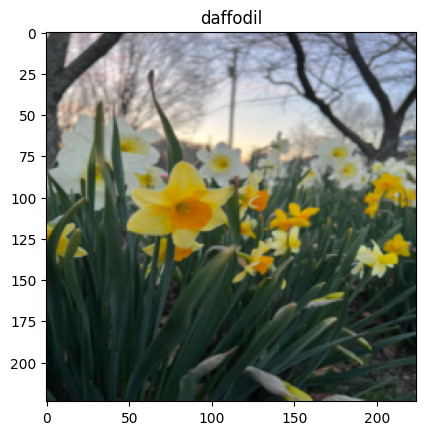

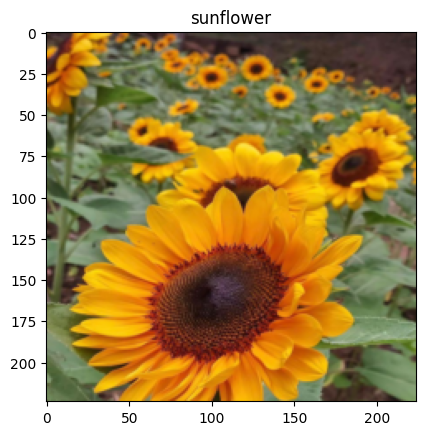

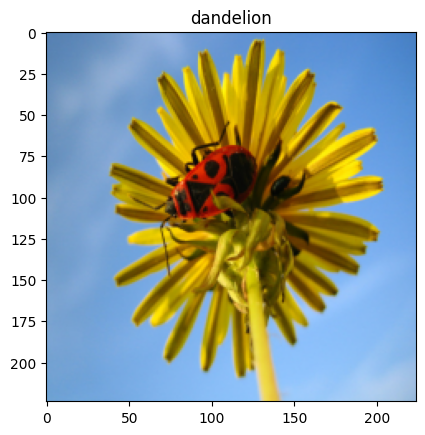

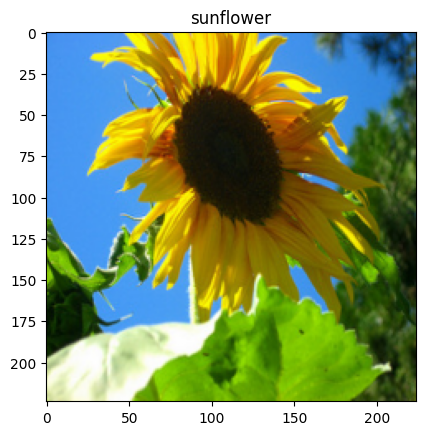

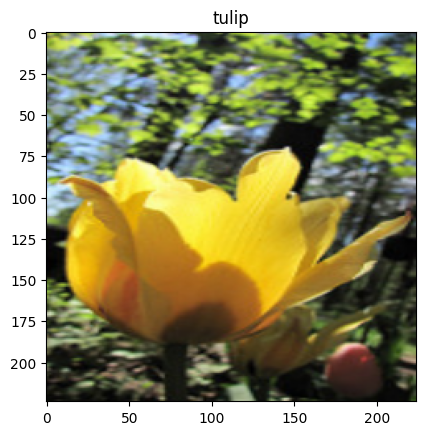

In [ ]:
#visualize samples of each minibatch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

batch_size = 8
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for batch_idx, (images, targets) in enumerate(dataloader):
    if batch_idx == 0:
        # Convert images from tensors to numpy arrays and transpose them to (batch_size, H, W, C) format
        images_np = np.transpose(images.numpy(), (0, 2, 3, 1))

        # Display the first image of each batch
        for i in range(batch_size):
            image_np = images_np[i]
            plt.imshow(image_np)
            plt.title(dataset.classes[targets[i]])
            plt.show()
